In [1]:
#Importing libraries for data analysis and vis
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
#importing keras
import keras

Using TensorFlow backend.


In [2]:
#uploading dataset
sonar = pd.read_csv("sonar (1).csv",header=None)

In [3]:
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [5]:
sonar.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

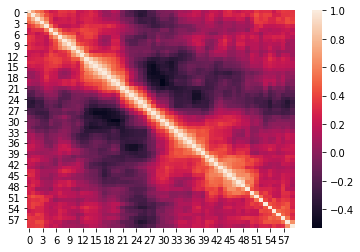

In [6]:
sb.heatmap(sonar.corr())
plt.show()

In [7]:
x = sonar.iloc[:,:60].values
y = sonar.iloc[:,60].values

In [8]:
#Converting datatype of y
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state=0)

In [12]:
len(x_train)

135

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
#loading my model(keras API)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
model = Sequential()

In [16]:
#building and initialising our ANN
model.add(Dense(40, input_dim=60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
#compiling my model and data
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, batch_size=15, epochs=100)

Epoch 1/100
135/135 [==============================] - 0s 2ms/step - loss: 0.7312 - accuracy: 0.5704
Epoch 2/100
135/135 [==============================] - 0s 155us/step - loss: 0.6272 - accuracy: 0.6444
Epoch 3/100
135/135 [==============================] - 0s 207us/step - loss: 0.5575 - accuracy: 0.7630
Epoch 4/100
135/135 [==============================] - 0s 200us/step - loss: 0.5024 - accuracy: 0.8074
Epoch 5/100
135/135 [==============================] - 0s 194us/step - loss: 0.4539 - accuracy: 0.8593
Epoch 6/100
135/135 [==============================] - 0s 245us/step - loss: 0.4084 - accuracy: 0.8815
Epoch 7/100
135/135 [==============================] - 0s 216us/step - loss: 0.3679 - accuracy: 0.9037
Epoch 8/100
135/135 [==============================] - 0s 222us/step - loss: 0.3312 - accuracy: 0.9185
Epoch 9/100
135/135 [==============================] - 0s 207us/step - loss: 0.2986 - accuracy: 0.9407
Epoch 10/100
135/135 [==============================] - 0s 198us/step - los

135/135 [==============================] - 0s 134us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 80/100
135/135 [==============================] - 0s 152us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 81/100
135/135 [==============================] - 0s 162us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 82/100
135/135 [==============================] - 0s 141us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 83/100
135/135 [==============================] - 0s 137us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 84/100
135/135 [==============================] - 0s 178us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 85/100
135/135 [==============================] - 0s 142us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 86/100
135/135 [==============================] - 0s 157us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 87/100
135/135 [==============================] - 0s 154us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 88/100
135/135 [==============================] - 0s 144us/step - loss:

In [19]:
y_predict = model.predict(x_test) > 0.5
y_predict

array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_predict)

0.863013698630137